<a href="https://colab.research.google.com/github/Felipeosouz/Formacao-Cientista-de-Dados/blob/main/Machine%20Learning/Neural%20Networks%20e%20Deep%20Learning/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, '2')

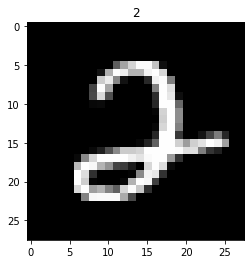

In [14]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

plt.imshow(X_treinamento[16], cmap = 'gray')
plt.title(y_treinamento[16])

In [15]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype("float32")
X_teste = X_teste.astype("float32")

# Normalização ( 255 é o valor máximo de um pixel )
X_treinamento /= 255
X_teste /= 255

# Transformação para formato dummy ( 10 classes )
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = "relu", input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = "relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = "relu"))
modelo.add(Dropout(0.2))
# Camada de saída, softmax probabilidade
modelo.add(Dense(units = 10, activation = "softmax"))

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [20]:
# Configuração dos parâmetros da rede neural e treinamento ( utilizando a base de dados de validação )
# Na variável historica temos os históricos das execuções ( erro e accuracy )
modelo.compile(optimizer = "adam", loss = "categorical_crossentropy",
               metrics = ["accuracy"])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.0707 - accuracy: 0.6227 - val_loss: 0.5071 - val_accuracy: 0.8525
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5404 - accuracy: 0.8355 - val_loss: 0.3357 - val_accuracy: 0.9015
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4323 - accuracy: 0.8716 - val_loss: 0.2810 - val_accuracy: 0.9165
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3736 - accuracy: 0.8903 - val_loss: 0.2549 - val_accuracy: 0.9227
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3372 - accuracy: 0.9011 - val_loss: 0.2325 - val_accuracy: 0.9311
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3102 - accuracy: 0.9084 - val_loss: 0.2016 - val_accuracy: 0.9388
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2904 - accuracy: 0.9141 - val_loss: 0.1905 - val_accuracy

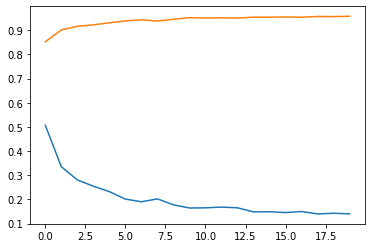

In [21]:
# Gráfico para verificar erro e accuracy
# Erro em azul, accuracy em laranja
historico.history.keys()
plt.plot(historico.history["val_loss"])
plt.plot(historico.history["val_accuracy"])

In [22]:
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 4ms/step


array([[1.3114910e-06, 4.1702614e-07, 1.8455452e-04, ..., 9.9968719e-01,
        4.8905594e-08, 6.0247490e-05],
       [7.6951608e-08, 5.9026793e-06, 9.9941432e-01, ..., 1.8237288e-11,
        3.8475329e-05, 3.7761740e-13],
       [3.1398474e-07, 9.9764276e-01, 2.1698301e-04, ..., 5.3953688e-04,
        9.1191754e-04, 7.0601855e-05],
       ...,
       [1.8540605e-07, 1.0314147e-07, 1.5987293e-06, ..., 3.9200298e-05,
        1.9579551e-05, 8.1555564e-03],
       [2.0042742e-06, 8.3809050e-07, 7.4133141e-08, ..., 3.1519252e-07,
        3.1166975e-04, 2.9291571e-04],
       [1.2935361e-06, 2.2383231e-10, 5.5285464e-06, ..., 3.0098794e-14,
        2.8532091e-07, 4.5134181e-11]], dtype=float32)

In [24]:
# Valor máximo ( com a probabilidade maior por serem 10 saídas ) e matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]

confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 962,    0,    1,    1,    2,    2,    8,    2,    2,    0],
       [   0, 1120,    4,    2,    0,    1,    3,    1,    3,    1],
       [   7,    2,  995,    3,    7,    0,    3,    8,    7,    0],
       [   0,    1,   14,  965,    1,   11,    0,   10,    6,    2],
       [   2,    0,    4,    0,  946,    0,    6,    1,    1,   22],
       [   6,    1,    1,   23,    2,  828,   14,    1,    8,    8],
       [  10,    3,    1,    1,   12,    3,  924,    0,    4,    0],
       [   2,    6,   11,    5,    8,    0,    0,  980,    0,   16],
       [   7,    6,    3,    6,    9,    6,    8,    6,  914,    9],
       [   9,    6,    0,    8,   21,    2,    0,   12,    3,  948]])

In [28]:
y_treinamento[19]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [35]:
novo = X_treinamento[19]
# Matriz para vetor
novo = np.expand_dims(novo, axis = 0)
pred = modelo.predict(novo)
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 44ms/step


[9]